In [285]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Carga y Preprocesamiento de Datos

Aquí se carga el conjunto de datos CSV en un DataFrame de pandas. Luego, se muestra el conteo de las clases en la columna `HeartDiseaseorAttack`, que es la variable objetivo.

In [286]:
# Cargar los datos
df = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [287]:
counts = df["HeartDiseaseorAttack"].value_counts()
print(counts)

HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: count, dtype: int64


# Separación de Características y Variable Objetivo

Se separan las características (X) de la variable objetivo (y). Las características son todas las columnas del DataFrame excepto la columna de la enfermedad cardíaca, que se convierte en la variable objetivo.

In [288]:
X = df.drop(columns=["HeartDiseaseorAttack"])
y = df["HeartDiseaseorAttack"]

# Normalización de Datos
Se normalizan las variables continuas utilizando StandardScaler, que escala los datos para que tengan una media de 0 y una desviación estándar de 1

In [289]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División de los Datos en Conjuntos de Entrenamiento y Prueba

Se divide el conjunto de datos en dos partes: uno para entrenamiento (X_train, y_train) y otro para prueba (X_test, y_test). El parámetro stratify=y asegura que la división preserve la proporción de clases en ambas partes, lo que es crucial en casos de clases desbalanceadas

In [290]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Construcción del Modelo de Red Neuronal
Se define un modelo de red neuronal secuencial con 5 capas densas (Dense) de 128 neuronas cada una. Entre cada capa, se usa normalización por lotes (BatchNormalization) y regularización mediante Dropout para evitar el sobreajuste. La capa final tiene una sola neurona con activación sigmoid, ya que se trata de un problema de clasificación binaria

In [291]:
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

/home/feliciano/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compilación del Modelo
Se compila el modelo especificando el optimizador (Adam), la función de pérdida (binary_crossentropy para clasificación binaria) y las métricas a evaluar durante el entrenamiento (precisión)

In [292]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenamiento del Modelo con Early Stopping
El modelo se entrena durante 50 épocas, pero se utiliza EarlyStopping para detener el entrenamiento si la pérdida de validación no mejora durante 5 épocas consecutivas, evitando el sobreajuste. La validación se realiza en el 20% de los datos de entrenamiento

In [293]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.8495 - loss: 0.3626 - val_accuracy: 0.9040 - val_loss: 0.2436
Epoch 2/50
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.9056 - loss: 0.2446 - val_accuracy: 0.9084 - val_loss: 0.2359
Epoch 3/50
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.9069 - loss: 0.2414 - val_accuracy: 0.9085 - val_loss: 0.2364
Epoch 4/50
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.9060 - loss: 0.2432 - val_accuracy: 0.9093 - val_loss: 0.2357
Epoch 5/50
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.9059 - loss: 0.2420 - val_accuracy: 0.9090 - val_loss: 0.2348
Epoch 6/50
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.9076 - loss: 0.2382 - val_accuracy: 0.9092 - val_loss: 0.2349
Epoch 7/50
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.9058 - loss: 0.2415 - val_accuracy: 0.9091 - val_loss: 0.2351
Epoch 8/50
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.9059 -

# Evaluación del Modelo
El modelo se evalúa en el conjunto de prueba para obtener la pérdida y la precisión. Estos valores permiten medir el rendimiento general del modelo en datos no vistos

In [294]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


1586/1586 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9105 - loss: 0.2337
Test Loss: 0.2373, Test Accuracy: 0.9079


# Optimización del Umbral para Minimizar Falsos Negativos
Se ajusta el umbral de decisión para maximizar el F1-score, que es una métrica de equilibrio entre precisión y recall. El mejor umbral se encuentra probando diferentes valores entre 0.1 y 0.9, y seleccionando el que da el mayor F1-score

In [295]:
y_probs = model.predict(X_test)
thresholds = np.linspace(0.1, 0.9, 50)
f1_scores = [f1_score(y_test, (y_probs >= t).astype(int)) for t in thresholds]
best_threshold = thresholds[np.argmax(f1_scores)]
best_f1 = max(f1_scores)

print(f"Mejor umbral según F1-score: {best_threshold:.2f} (F1-score: {best_f1:.4f})")

1586/1586 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
Mejor umbral según F1-score: 0.21 (F1-score: 0.4214)


# Aplicación del Mejor Umbral y Evaluación
Se aplica el umbral óptimo para generar las predicciones finales. Luego, se muestra la matriz de confusión para visualizar la cantidad de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos. También se imprime un reporte de clasificación que incluye métricas como precisión, recall y F1-score

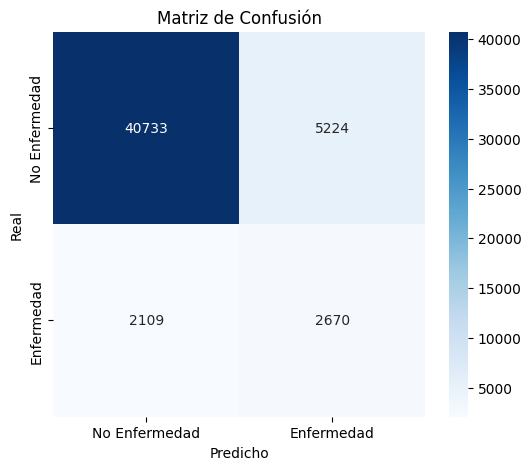

              precision    recall  f1-score   support

         0.0       0.95      0.89      0.92     45957
         1.0       0.34      0.56      0.42      4779

    accuracy                           0.86     50736
   macro avg       0.64      0.72      0.67     50736
weighted avg       0.89      0.86      0.87     50736



In [296]:
y_pred_opt = (y_probs >= best_threshold).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred_opt)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Enfermedad", "Enfermedad"], yticklabels=["No Enfermedad", "Enfermedad"])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

print(classification_report(y_test, y_pred_opt))